In the last file, we created scatter plots and used correlation analysis to quantify relationships between demographic variables and SAT scores.

Some variables, like the percentage of students who graduate from a high school (`grads_percent`), displayed strong **positive** correlations with SAT scores. Others, like the percentage of students eligible for receiving school lunch at a discount due to low household income (`frl_percent`), displayed strong **negative** correlations with SAT scores.

The correlations suggest that students who come from communities with certain demographic and socioeconomic features may be at a disadvantage when it comes to performance on standardized tests like the SAT.

In this file, we will continue exploring the NYC schools data â€” this time by comparing academic and demographic indicators among communities. We will calculate summary statistics and create boxplots to understand how academic performance and demographic variables vary geographically in NYC.

As we explore differences in academic performance and demographics among NYC boroughs, we will learn about an especially important component of data cleaning: Dealing with missing data.

Geographically, NYC is divided into five administrative districts called **boroughs**:

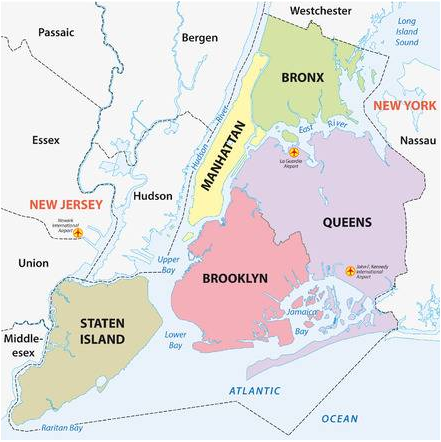

The five boroughs are [characterized by very different socioeconomic conditions](https://en.wikipedia.org/wiki/Demographics_of_New_York_City). For example, the linked Wikipedia article contains the following table that illustrates differences in household income among the five boroughs:

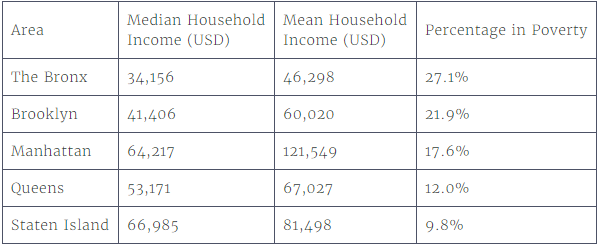

Let's import the NYC schools data into R and get started.

`library(readr)`

`combined <- read_csv("combined(1).csv")`

In this file, as we analyze the NYC schools data for differences among boroughs, we'll learn three types of techniques for handling [missing data](https://en.wikipedia.org/wiki/Missing_data) in R. First, though, let's clarify what we mean when we talk about missing data.

Recall that when we adhere to tidy data principles, dataframes are arranged with variables in columns, observations in rows, and values in cells. When a data point is missing, it means that no value is present for an observation of a variable. In R, missing values are represented by `NA`, which stands for "not available."


Missing data represented by `NA` is referred to as **explicit** missing data. Missing data that are simply not included in a dataset are referred to as **implicit**. In this file, we will focus on handling explicit missing data represented by `NA`.

Now that we've defined missing data, let's begin our analysis.

As a first step for understanding differences in academic performance among boroughs, let's calculate the average SAT score for each borough.

**Task**

* Calculate the average SAT score (`avg_sat_score`) for each borough (`boro`).

**Answer**

`summary <- combined %>% group_by(boro) %>% summarize(mean(avg_sat_score))`

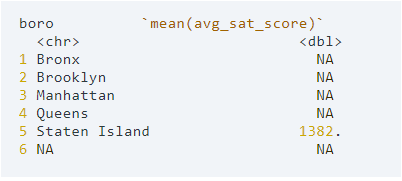

The table isn't very informative. We only have an average SAT score for Staten Island. Also notice that, although there are only five boroughs in NYC, our table contains a sixth row with a value of `NA` for borough.

What happened?

Let's first discuss the `NA` values in the `mean(avg_sat_score)` column. To understand why we got `NA` when we calculated averages by borough, we need to understand that in R, **missing values are "contagious**."

In other words, if a variable contains any `NA` values, any summary calculations performed on that variable will result in an answer of `NA`.

For example, we know that the variable `frl_percent` in `combined` contains NA values. If we calculate average of `frl_percent` variable, the result of the calculation will be `NA`.

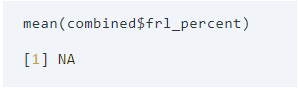

To **exclude** NA values from a calculation, we can add the argument `na.rm = TRUE` to our functions. This argument specifies that the calculation should include only values that are not missing. `na.rm` stands for "NA remove."

If we return to our calculation of the average of `frl_percent`, we could exclude `NA` values from the calculation using the following syntax:

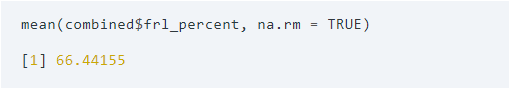

If we use this approach to calculating the average , `NA` values would be omitted from the calculation

**Task**

* Calculate the average SAT score (`avg_sat_score`) for each borough (`boro`). Do not include missing values of `avg_sat_score` in our analysis.

**Answer**

`summary <- combined %>%
  group_by(boro) %>%
  summarize(mean(avg_sat_score, na.rm = TRUE))`

We have calculated an average SAT score for each borough

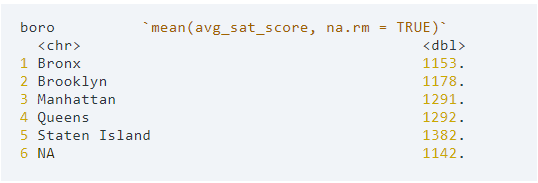

It's interesting to note the differences among scores. Staten Island, the wealthiest borough according to the table, has the highest SAT scores. The Bronx, which has the most poverty, has much lower scores. Notice, however, that the lowest average SAT score is associated with the borough `NA`. What happened here?

Since values of `NA` are present as values of the `boro` variable, when we grouped the dataframe by `boro` using `group_by()`, R assigned `NA` as a sixth category of the variable.

To avoid including observations of `avg_sat_score` associated with `NA` values of `boro` in our calculation, we could use the `filter()` function:

`combined %>% filter(!is.na(boro))`

In the code above, `is.na()` is a function that returns a logical vector with a value of either `TRUE` or `FALSE` for each value of the `boro` variable. Preceding `is.na()` with the operator `!` specifies that we want to filter `boro` to return only values that are not `NA`.

For a shorthand way of dropping the `NA` values of the `boro` variable, we can use the function `drop_na()` from the `tidyr` package:

`combined %>% drop_na(boro)`

This will drop rows that have values of `NA` for `boro`.

**Task**

* Calculate the average SAT score (`avg_sat_score`) for each borough (`boro`).
    * Do not include rows for which values of `boro` are `NA`.
    * Exclude missing values (`NA`) of avg_sat_score from your calculation.
    
**Answer**

`summary_2 <- combined %>%
  drop_na(boro) %>%
  group_by(boro) %>%
  summarize(sat_avg = mean(avg_sat_score, na.rm = TRUE))`

Now we have the following summary table:
    
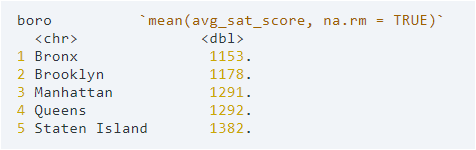   

In some cases, we can be more efficient in our calculation by simply dropping all rows that contain a value of `NA` for any variable in our dataframe.

We can use this approach, known as using complete cases, using the `drop_na()` function. If we don't specify any variables, the function will automatically drop rows for which any variable in the dataframe contains an `NA`.

The following code would return a new `combined` dataframe without any rows containing an `NA` for any variable:

`combined %>% drop_na()`

When we use complete cases to perform calculations, we do not need to use the `na.rm = TRUE` argument for calculations since our dataframe will contain no additional missing values.

**Task**

* Calculate the average SAT score (`avg_sat_score`) for each borough (`boro`).
    * Only use complete cases; that is, rows of the `combined` dataframe that contain no `NA` values.
    
**Answer**

`summary_3 <- combined %>% drop_na() %>% group_by(boro) %>% summarize(mean(avg_sat_score))`

If a certain variable has an especially large number of missing values, dropping those rows could bias the analysis of a different variable.

Let's calculate the number of missing values for each variable in the `combined` dataframe. To do this, we'll introduce a handy base R function: `colSums()`. The `colSums()` function allows us to quickly calculate summaries of each column in a dataframe, which are output as a vector.

To calculate the number of `NA` values in each column, we will use the `is.na()` function, returns a logical vector with `TRUE` when a value is `NA` and `FALSE` then the value is not missing.

The syntax for calculating the number of missing values in each column of a dataframe looks like this:

`colSums(is.na(data_frame))`

The `colSums()` function returns a vector with a count of missing values for each column of the dataframe.

**Task**

* Calculate the number of missing values (`NA`) in the `combined` dataframe. Save the resulting vector as `na_count`

**Answer**

`na_count <- colSums(is.na(combined))`

Now, we've calculated the number of explicitly missing values for each variable in the `combined` dataframe. We can use this information to understand whether large numbers of missing values for certain variables may have biased our calculations of boroughs' average SAT scores when we used complete cases.

Let's have a look at the number of missing values for each variable in `combined`:

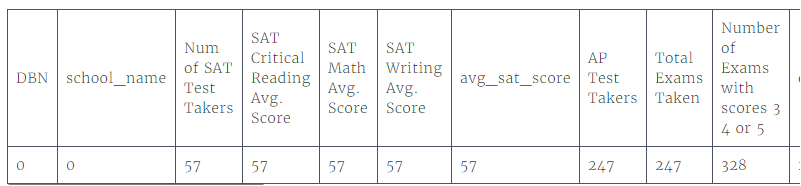

In our analysis, therefore, it probably does not make sense to use complete cases to deal with missing data when performing calculations. The approach we used to calculate `summary_2`, dropping observations with `NA` values for `boro` and omitted `NA` values of `avg_sat_score` from our calculation using the argument `na.rm = TRUE`, is less likely to bias our results by omitting observations of `avg_sat_score` from lower-performing schools.

**Task**

* Calculate the average of the following variables by borough (`boro`):

    - avg_sat_score
    - frl_percent
    - AP Test Takers
    
* Drop observations for which values of `boro` are `NA`.
* Exclude `NA` values of the three variables from our calculation.

**Answer**

`summary_4 <- combined %>%
    drop_na(boro) %>%
    group_by(boro) %>%
    summarize(mean(avg_sat_score, na.rm = TRUE), mean(frl_percent, na.rm = TRUE), mean(`AP Test Takers`, na.rm = TRUE))`

We have spent less time thinking about why the missing values are present in the dataset to begin with. Often, knowing the specifics of how the data were collected or entered can help with choosing the best method for dealing with them.

When we performed the summary calculation of the average number of students at each school who took AP exams per borough, did that number reflect the true average? In other words, did values of `NA` represent missing data? Or did they actually represent a number, perhaps that zero students at the school took an exam?

If those values of `NA` actually represent zeros and we excluded them from analysis, the averages we calculated may be much higher than the actual average number of students who took exams.

Often, datasets will contain values of `NA` that actually mean something other than "this value is missing." While this is confusing for those of us who must analyze the data, it is a reality that needs to be considered when we decide how best to work with missing data.

If we can't simply ask the person who shared the data with us, the best approach for figuring out why our dataset contains so many `NA` values is to consult the metadata. Let's revisit the [metadata](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) for the `ap_2010` dataset to see what we can find out.

The metadata states that, for `AP Test Takers`, "Records with 5 or fewer students are suppressed." This tells us that some of the `NA` values may represent values between zero and five, but unfortunately, this dataset does not contain information to help us differentiate between values for schools where five or fewer students took the AP exam and actual missing data.

This is an example of a typical challenge when it comes to working with messy, real-world data. In this case, we can't be certain that every `NA` in the `AP Test Takers` column represents a value between zero and five, but since the AP exam is often taken by students at schools in more affluent areas, knowing that very few or zero students at a school took the exam is useful for understanding the relationship between SAT scores and demographics.

Let's make the decision to replace the `NA` values for `AP Test Takers` with the median of zero and five: 2.5. This technique for handling missing data, replacing them with an appropriate substituted value, is called [imputing](https://en.wikipedia.org/wiki/Imputation_(statistics))

To replace `NA` values with "2.5" for our selected variables, we will use the `tidyr` package function `replace_na()`.

The `replace_na()` function takes as arguments a dataframe or vector and the value we want to replace its values of `NA` with. For example, to replace all `NA` values of `avg_sat_score` with 0, we would write:

`replace_na(combined$avg_sat_score, "0")`

We can use `mutate()` with `replace_na()` to create a new column for the variable we replaced missing values.

Let's replace `NA` values of `AP Test Takers` with 2.5 and recalculate the average number of AP test takers per borough.

**Task**

* Create a new `AP Test Takers` variable in the combined dataframe in which `NA` values are replaced by "2.5".

* Drop the `NA` values of `boro` variable and save the resulting dataframe as `combined_2`.

* Create a boxplot showing a summary of the number of AP test takers by borough using the `combined_2` dataframe. Use default `ggplot2` settings for background and axis titles.

**Task**

`library(ggplot2)`

`combined <- combined  %>%
  mutate(`AP Test Takers` = replace_na(`AP Test Takers`, 2.5))`
    
`combined_2 <- combined %>%
  drop_na(boro)`

`ggplot(data = combined_2) +
    aes(x = boro, y = `AP Test Takers`) +
    geom_boxplot()`